<a href="https://colab.research.google.com/github/hardikdhamija96/netflix-asset/blob/main/Business_Case_Netflix_Data_Exploration_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🟦 Business Case: Netflix - Data Exploration and Visualization



<div align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/0/08/Netflix_2015_logo.svg" width="350">
</div>

#### To explore Netflix’s content catalog and derive insights that guide content production and regional growth strategy."

<h4><strong>Hardik Dhamija | Data Analyst | 2025</strong></h4>
<a href="https://www.linkedin.com/in/hardikdhamija" target="_blank">Connect me on LinkedIn</a>


---

## 🔷 Business Problem

This project aims to analyze Netflix’s content catalog to help the company:
- Decide which type of content (TV Shows vs Movies, genres) to produce.
- Identify regional content trends to support international growth.

---

## 🔷 Objective

To perform a structured data exploration and visualization on Netflix’s catalog data, with the goal of:
- Uncovering trends in content type, ratings, genres, and countries.
- Analyzing content release patterns over time.
- Identifying key actors, directors, or categories contributing to content volume.

---
## 🔷 Deliverables
The final outcome will include:
- Cleaned and structured dataset
- Univariate and bivariate visualizations
- Business insights derived from trends in content type, region, and time
- Clear, actionable recommendations for Netflix’s content strategy


## 🔷 Data Overview and Initial Checks

This section focuses on loading the dataset, understanding its structure, and performing basic quality checks.


###🔹 1. Importing the Dataset

In [59]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Link Google Drive for file access
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
# Importing and loading file
# Dataset loaded from local project folder (e.g., /netflix.xlsx)
file_path = '/content/drive/MyDrive/Netflix Project/netflix.xlsx'

import pandas as pd
df = pd.read_excel(file_path)
print("Dataset Loaded Successfully. Shape:", df.shape)

Dataset Loaded Successfully. Shape: (8807, 12)


### 🔹2. Data Overview and Initial Checks

- Understand structure, data types, and potential data quality issues
- Detect missing or inconsistent values
- Identify columns that may need cleaning or type conversion

In [62]:
# Basic info and shape

df.info()

print("-"*40)

print(f"\nShape -> {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
----------------------------------------

Shape -> (8807, 12)


In [63]:
# List of all columns
print(df.columns.tolist())

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


#### 🔹 Outcome

- Dataset contains 8807 records.
- All columns except `release_year` are initially of type object.
- Columns like `director`, `cast`, `country`, `date_added`, `rating`, and `duration` contain missing values.
- `show_id` is a unique identifier for each title.



In [64]:
# Unique shows
print("Total unique shows:", df['show_id'].nunique())

Total unique shows: 8807


In [65]:
# Most common ratings
df['rating'].value_counts().head(10)

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [66]:
# Most common countries
df['country'].value_counts().head(10)

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


In [67]:
# Most common raw genres (from listed_in)
df['listed_in'].value_counts().head(10)

,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
Kids' TV,220
Children & Family Movies,215
"Children & Family Movies, Comedies",201
"Documentaries, International Movies",186


### 🔷 Basic Metrics Summary

- The dataset has **8807 unique shows**
- Content ranges from **1925 to 2021** — almost 100 years of entertainment
- Most of the content is **Movies**, but there are many **TV Shows** too
- The most common ratings are **TV-MA**, **TV-14**, and **TV-PG**
- **United States**, **India**, and **United Kingdom** are the top countries where most shows are made
- Popular genre combinations include:
  - *Dramas, International Movies*
  - *Documentaries*
  - *Stand-Up Comedy*


In [68]:
# Content release year range
df['release_year'].min(), df['release_year'].max()

(1925, 2021)

In [69]:
# View top 3 records
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


#### 🔹 Column Observations

- `type`: Indicates whether the content is a Movie or TV Show
- `director`, `cast`: Contain missing values; cast often includes multiple names
- `rating`: Maturity ratings — see reference tables below for MPAA and TV categories
- `duration`: Stores either total minutes (for movies) or seasons (for TV shows)
- `listed_in`: Represents genre(s); often multiple genres per entry
- `country`: Can list multiple countries
- `description`: Free text — not used in this analysis but could support NLP or sentiment later





## 🔷 Data Preprocessing and Cleaning

This section focuses on preparing the dataset for analysis by:

- Converting data types (e.g., parsing `date_added`, setting categorical fields)
- Extracting structured values from complex fields like `duration`
- Handling missing values appropriately based on their role
- Cleaning and standardizing values for consistency
- Creating new features to support insights (e.g., `year_added`, `duration_int`)


### 🔹1. Converting Data Types

To optimize memory usage and ensure accurate analysis, we begin by converting appropriate columns:

- `type` and `rating` → Converted to **category** for efficient filtering and grouping
- `date_added` → Parsed into **datetime** format to support time-based analysis



In [70]:
# Category types
df['type'] = df['type'].astype('category')
df['rating'] = df['rating'].astype('category')

In [71]:
# to date type
df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')

In [72]:
df.dtypes

,0
show_id,object
type,category
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,category
duration,object


#### ✅ Outcome

- `type` and `rating` columns have been successfully converted to `category`
- `date_added` has been parsed to `datetime` without introducing new nulls
- Data types are now consistent and ready for further analysis




### 🔹2. Handling Missing Values

We begin by identifying columns with missing values and then address them based on their importance and usage in analysis.


In [73]:
# Check missing values across all columns
df.isna().sum().sort_values(ascending=False)

,0
director,2634
country,831
cast,825
date_added,98
rating,4
duration,3
show_id,0
type,0
title,0
release_year,0


In [74]:
# step 1: Add "Unrated" to the list of allowed categories
df['rating'] = df['rating'].cat.add_categories(['Unrated'])
# step 2: Now fill the missing values
df['rating'] = df['rating'].fillna('Unrated')

# Fill missing 'director' and 'cast' with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

# Fill missing 'country' if needed
df['country'] = df['country'].fillna('Unknown')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   category      
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: category(2), datetime64[ns](1), int64(1), object(8)
memory usage: 706.2+ KB


In [76]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


### 🔹2.1 Diagnosing Missing `duration` Values

We inspect rows where `duration` is missing to determine the nature of the nulls.  
This helps guide how we handle them in the next step.



In [77]:
# Checking rows with duration null
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


#### ⚠️ Issue Identified

In some rows, the duration value is incorrectly found in the `rating` column (e.g., "66 min").  
These rows are corrected manually using `show_id`.


In [78]:
# Fixing Duration
mask = df['show_id'].isin(['s5542', 's5795', 's5814'])
df.loc[mask, 'duration'] = df.loc[mask, 'rating']

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   category      
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: category(2), datetime64[ns](1), int64(1), object(8)
memory usage: 706.2+ KB


In [80]:
# Reset rating
df.loc[mask, 'rating'] = 'Unrated'

#### 🔹 Outcome

- Initial check showed that `director`, `cast`, `country`, `rating`, `date_added`, and `duration` had missing values
- Nulls in `director`, `cast`, `country`, and `rating` were filled with `"Unknown"` and `"Unrated"` as appropriate
- Investigation into missing `duration` values revealed misalignment of values into the `rating` column
- These were  corrected
- Nulls in `date_added` were retained for now and will be handled during time-based analysis



### 🔹3. Feature Extraction

We derive new features from existing columns to support deeper trend analysis and uncover hidden patterns in the data:

- `duration_int`: Extracted from `duration` to capture numeric value
- `year_added`, `month_added`: Extracted from `date_added` for time-based analysis
- `num_genres`: Number of genres per content (from `listed_in`)
- `num_cast`: Number of cast members listed
- `is_multi_country`: Flags content associated with more than one country


### 🔹3.1 Extracting `duration_int`

We extract the numeric portion from the `duration` column to create `duration_int`.  
This allows us to perform numeric analysis on content length — whether in minutes (for Movies) or seasons (for TV Shows).


In [81]:
# Extract the numeric part from duration
df['duration_int'] = df['duration'].str.extract(r'^(\d+)').astype('Int64')

### 🔹3.2 Extracting `year_added` and `month_added`

To support time-based trend analysis, we extract the year and month from the `date_added` column.

In [82]:
# Extract year and month from date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [83]:
# Values are float
df[['date_added', 'year_added', 'month_added']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_added   8709 non-null   datetime64[ns]
 1   year_added   8709 non-null   float64       
 2   month_added  8709 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 206.5 KB


In [84]:
df['year_added'] = df['year_added'].astype('Int64')     # Nullable integer type
df['month_added'] = df['month_added'].astype('Int64')

In [85]:
df[['date_added', 'year_added', 'month_added']].tail()

,date_added,year_added,month_added
8802,2019-11-20,2019,11
8803,2019-07-01,2019,7
8804,2019-11-01,2019,11
8805,2020-01-11,2020,1
8806,2019-03-02,2019,3


### 🔹3.3 Extracting `num_genres`

The `listed_in` column often contains multiple genres separated by commas.  
We extract the number of genres per title to analyze content diversity.



In [86]:
# Extract number of genres
df['num_genres'] = df['listed_in'].apply(lambda x: len(str(x).split(',')))

In [87]:
# Convert to nullable integer
df['num_genres'] = df['num_genres'].astype('Int64')

In [88]:
df[['listed_in', 'num_genres']].head()

,listed_in,num_genres
0,Documentaries,1
1,"International TV Shows, TV Dramas, TV Mysteries",3
2,"Crime TV Shows, International TV Shows, TV Act...",3
3,"Docuseries, Reality TV",2
4,"International TV Shows, Romantic TV Shows, TV ...",3


### 🔹3.4 Extracting `num_cast`

The `cast` column contains multiple actor names separated by commas.  
We calculate the number of listed cast members per title to support analysis of ensemble size and casting patterns.


In [89]:
# Count number of cast members per title
df['num_cast'] = df['cast'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

In [90]:
# Convert to nullable integer
df['num_cast'] = df['num_cast'].astype('Int64')

In [91]:
df[['num_cast','cast']].head()

,num_cast,cast
0,1,Unknown
1,19,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,9,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,1,Unknown
4,8,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."


### 🔹3.5 Extracting `is_multi_country`

The `country` column may contain multiple countries per title.  
We flag such entries with a boolean column `is_multi_country` to enable region-level analysis and filtering.


In [92]:
# Extract multi country or not
df['is_multi_country'] = df['country'].apply(lambda x: ',' in str(x))

In [93]:
df['is_multi_country'].value_counts()

,count
is_multi_country,
False,7487
True,1320


#### 🔹 Outcome

- New features (`duration_int`, `year_added`, `month_added`, `num_genres`, `num_cast`, `is_multi_country`) were successfully created
- These will be used to uncover trends in time, genre diversity, content structure, and regional reach


#### Total 18 columns should be there in df now 👇

In [94]:
# 18 rows should be there
df.shape

(8807, 18)

In [95]:
df.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description',
 'duration_int',
 'year_added',
 'month_added',
 'num_genres',
 'num_cast',
 'is_multi_country']

In [96]:
# Descriptive summary of newly created numeric features
df[['duration_int', 'num_genres', 'num_cast']].describe()

,duration_int,num_genres,num_cast
count,8807.0,8807.0,8807.0
mean,69.84853,2.19405,7.374929
std,50.806431,0.784341,4.72885
min,1.0,1.0,1.0
25%,2.0,2.0,4.0
50%,88.0,2.0,8.0
75%,106.0,3.0,10.0
max,312.0,3.0,50.0


### 🔹4. Splitting Composite Fields

To enable easier frequency analysis and filtering, we convert multi-valued text fields into lists:

- `cast_list`: List of cast members per title (from `cast`)
- `genre_list`: List of genres per title (from `listed_in`)
- `country_list`: List of countries per title (from `country`)

This allows direct operations like filtering, counting, and exploding without creating multiple columns.


In [97]:
# creating list column for cast column
df['cast_list'] = df['cast'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])

In [98]:
df[['cast','cast_list']].head()

,cast,cast_list
0,Unknown,[Unknown]
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba..."
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab..."
3,Unknown,[Unknown]
4,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ..."


In [99]:
# creating list column for genre/listed_in column
df['genre_list'] = df['listed_in'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])

In [100]:
df[['listed_in','genre_list']].head()

,listed_in,genre_list
0,Documentaries,[Documentaries]
1,"International TV Shows, TV Dramas, TV Mysteries","[International TV Shows, TV Dramas, TV Mysteries]"
2,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV Ac..."
3,"Docuseries, Reality TV","[Docuseries, Reality TV]"
4,"International TV Shows, Romantic TV Shows, TV ...","[International TV Shows, Romantic TV Shows, TV..."


In [101]:
# creating list column for country column
df['country_list'] = df['country'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])

In [102]:
df[['country','country_list']].head(10)

,country,country_list
0,United States,[United States]
1,South Africa,[South Africa]
2,Unknown,[Unknown]
3,Unknown,[Unknown]
4,India,[India]
5,Unknown,[Unknown]
6,Unknown,[Unknown]
7,"United States, Ghana, Burkina Faso, United Kin...","[United States, Ghana, Burkina Faso, United Ki..."
8,United Kingdom,[United Kingdom]
9,United States,[United States]


#### ⚠️ Note

Before analyzing or performing operations on list-based columns, we will use `.explode()` to flatten the lists into individual rows.  
This simplifies value counting, filtering, and plotting without altering the original structure.


### 🔹5. Final Validation

We perform a final check to confirm that the dataset is properly cleaned and structured before beginning the analysis.

- ✅ Data types are correctly set (e.g., `date_added` as datetime, `rating` as category)
- ✅ No misplaced values across columns
- ✅ Derived columns (`duration_int`, `year_added`, `num_genres`, etc.) are correctly populated
- ✅ Key columns like `duration` have no remaining missing or misaligned values
- ✅ Composite fields have been converted to lists for flexible use


In [103]:
# Check column names and data types
df.dtypes

,0
show_id,object
type,category
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,category
duration,object


In [104]:
# Check for any remaining null values
df.isna().sum().sort_values(ascending=False)

,0
date_added,98
year_added,98
month_added,98
type,0
show_id,0
cast,0
director,0
title,0
country,0
duration,0


In [105]:
# Confirm shape
print(f"Final Dataset Shape: {df.shape}")

Final Dataset Shape: (8807, 21)


## 🔷 Outlier Check

To detect unusually high or low values in key numeric columns, we use boxplots.  
This helps ensure that no extreme outliers distort the upcoming analysis.


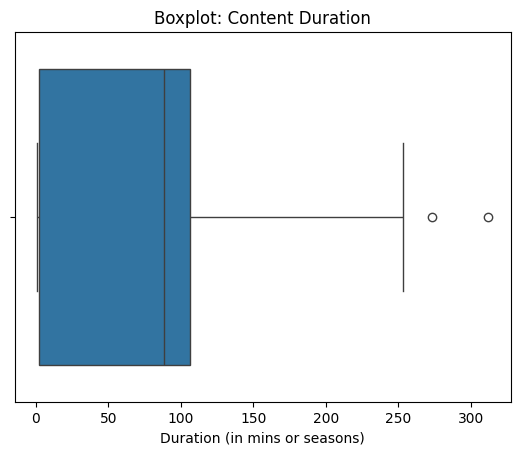

In [106]:
# Boxplot for content duration
sns.boxplot(x=df['duration_int'])
plt.title('Boxplot: Content Duration')
plt.xlabel('Duration (in mins or seasons)')
plt.show()

#### 🔍 Observation

- Most shows or movies have a duration less than 250 (minutes or seasons)
- A few titles go beyond this — probably long-format films or extended series
- We’ve kept these outliers, as they seem valid and don’t affect the overall trends much



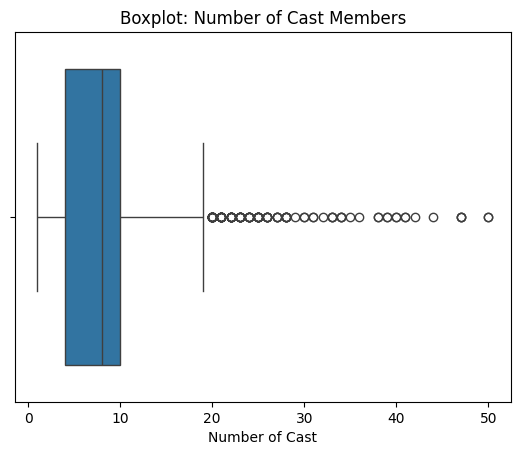

In [107]:
sns.boxplot(x=df['num_cast'])
plt.title('Boxplot: Number of Cast Members')
plt.xlabel('Number of Cast')
plt.show()


#### 🔍 Observation

- Most titles have 2 to 15 cast members
- Some go above 40 — likely big ensemble shows or documentary-type content
- These outliers are kept, as they seem valid and don’t impact the overall analysis much


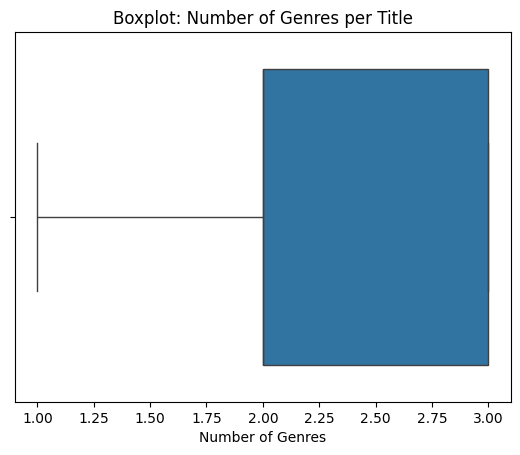

In [108]:
sns.boxplot(x=df['num_genres'])
plt.title('Boxplot: Number of Genres per Title')
plt.xlabel('Number of Genres')
plt.show()

#### 🔍 Observation

- Most titles are tagged with 2 to 3 genres
- Some have only one genre — which makes sense for focused or niche content
- No major outliers found — genre tagging looks quite consistent overall


In [109]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,duration_int,year_added,month_added,num_genres,num_cast,is_multi_country,cast_list,genre_list,country_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,...,"As her father nears the end of his life, filmm...",90,2021,9,1,1,False,[Unknown],[Documentaries],[United States]
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2,2021,9,3,19,False,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...","[International TV Shows, TV Dramas, TV Mysteries]",[South Africa]
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,...,To protect his family from a powerful drug lor...,1,2021,9,3,9,False,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...","[Crime TV Shows, International TV Shows, TV Ac...",[Unknown]
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,...,"Feuds, flirtations and toilet talk go down amo...",1,2021,9,2,1,False,[Unknown],"[Docuseries, Reality TV]",[Unknown]
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,In a city of coaching centers known to train I...,2,2021,9,3,8,False,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...","[International TV Shows, Romantic TV Shows, TV...",[India]


In [110]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'duration_int', 'year_added', 'month_added', 'num_genres', 'num_cast',
       'is_multi_country', 'cast_list', 'genre_list', 'country_list'],
      dtype='object')

In [111]:
genre = df[['show_id','num_genres','genre_list']]

In [112]:
genre.head()

,show_id,num_genres,genre_list
0,s1,1,[Documentaries]
1,s2,3,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,3,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,2,"[Docuseries, Reality TV]"
4,s5,3,"[International TV Shows, Romantic TV Shows, TV..."


In [113]:
df_exploded_genre = genre.explode('genre_list')

In [114]:
df_exploded_genre.head()

,show_id,num_genres,genre_list
0,s1,1,Documentaries
1,s2,3,International TV Shows
1,s2,3,TV Dramas
1,s2,3,TV Mysteries
2,s3,3,Crime TV Shows


## 🔷 Non Graphical Analysis

### 🔹 Q1: What type of content dominates on Netflix?

In [115]:
df['type'].value_counts()


,count
type,
Movie,6131
TV Show,2676


#### 🔵 Observation
- Movies are much more than TV Shows

## 🔷 Understanding Movie & TV Ratings

Before analyzing content ratings in the dataset, it's important to know what each rating actually means.  
Below are standard rating categories for Movies and TV Shows, along with suggested age groups.

---

### 🎬 Movie Ratings (MPAA)

| Rating | Meaning                                                         | Suggested Age |
|--------|------------------------------------------------------------------|----------------|
| G      | General Audiences – All ages admitted                           | All ages       |
| PG     | Parental Guidance Suggested                                     | 8+             |
| PG-13  | Parents Strongly Cautioned – May be inappropriate for under 13  | 13+            |
| R      | Restricted – Under 17 requires accompanying adult               | 17+            |
| NC-17  | No one 17 and under admitted                                     | 18+            |

---

### 📺 TV Ratings (TV Parental Guidelines)

| Rating  | Meaning                                                         | Suggested Age |
|---------|------------------------------------------------------------------|----------------|
| TV-Y    | Suitable for all children                                        | 2–6            |
| TV-Y7   | Suitable for children age 7 and above                            | 7+             |
| TV-G    | General audience                                                 | All ages       |
| TV-PG   | Parental guidance suggested                                      | 10+            |
| TV-14   | Parents strongly cautioned – May be unsuitable for under 14     | 14+            |
| TV-MA   | Mature audience only – Not suitable for under 17                 | 17+            |

---

### 🔁 Rating Equivalents (Approximate)

| Movie Rating | Equivalent TV Rating |
|--------------|----------------------|
| PG-13        | TV-14                |
| R            | TV-MA                |

---

### 🖼️ Visual Reference

<img src="https://static.wikia.nocookie.net/rating-system/images/b/b7/TV_Ratings.png/revision/latest?cb=20240705220343" width="400">

<img src="https://smarttvs.org/wp-content/uploads/2022/08/Other-Ratings-of-Movies.jpeg" width="400">

---

Now that we understand what these ratings mean, let’s explore which ones are most common on Netflix.


In [58]:
from google.colab import files
files.upload()

TypeError: 'NoneType' object is not subscriptable

### 🔹 Creating a User-Friendly Rating Category

Netflix uses two rating systems — MPAA (for movies) and TV Parental Guidelines (for shows).  
These detailed ratings like **TV-MA**, **PG-13**, etc., are useful, but a bit too granular for high-level audience analysis.

To simplify things, we grouped them into broader, easy-to-understand categories:

- **Mature** → Adult content (TV-MA, R, NC-17)
- **Teen** → Teenage and above (TV-14, PG-13)
- **Family** → General viewing with parental guidance (TV-PG, PG, TV-G)
- **Kids** → Children’s content (TV-Y7, TV-Y, G)
- **Unrated** → NR, missing, or undefined ratings

---

### 🎯 Audience Type Classification

The following visual summarizes the classification we’ve used:

<img src="https://raw.githubusercontent.com/hardikdhamija96/netflix-asset/63c931ed4a7900d6523148844033f7709a4671e4/content_rating.png" width="500">

---

This new column will help us analyze audience focus more easily and find possible content gaps.



In [116]:
def map_rating_category(rating):
    if rating in ['TV-MA', 'R', 'NC-17']:
        return 'Mature'
    elif rating in ['TV-14', 'PG-13']:
        return 'Teen'
    elif rating in ['TV-PG', 'PG', 'TV-G']:
        return 'Family'
    elif rating in ['TV-Y7', 'TV-Y', 'G']:
        return 'Kids'
    else:
        return 'Unrated'

df['rating_category'] = df['rating'].apply(map_rating_category)

### 🔹Q2: What type of audience is most targeted based on content ratings?

In [117]:
df['rating_category'].value_counts().reset_index(name="count").head()

,rating_category,count
0,Mature,4009
1,Teen,2650
2,Family,1370
3,Kids,682
4,Unrated,96


- Most content falls under the **Mature** and **Teen** categories
- Very little content is targeted toward **Kids** or **Family** viewing
- This shows that Netflix mostly focuses on older audiences, and may have a gap in children’s or family-friendly content


### 🔹 Q3: What type of content is more common within each audience category?

In [118]:
# % of movies vs shows within each rating group
pd.crosstab(df['rating_category'], df['type'], normalize='index') * 100

type,Movie,TV Show
rating_category,,
Family,69.562044,30.437956
Kids,45.601173,54.398827
Mature,71.389374,28.610626
Teen,72.339623,27.660377
Unrated,91.666667,8.333333



- **Mature**, **Teen**, and **Family** categories are mostly Movies (around 70% or more)
- **Kids** content is more balanced, with even more **TV Shows** than Movies
- **Unrated** content is almost entirely Movies
- Overall, Netflix prefers Movies for most audience groups, but gives more TV content to younger viewers — possibly to build habits or long-term engagement


### 🔹 Q4: Which countries produce the most Netflix content?

In [119]:
# top countries by number of titles
df['country_list'].explode().value_counts().head(10)


,count
country_list,
United States,3690
India,1046
Unknown,831
United Kingdom,806
Canada,445
France,393
Japan,318
Spain,232
South Korea,231




- **United States** is by far the largest content contributor, with over 3,600 titles
- **India**, **United Kingdom**, and **Canada** also have strong representation in the catalog
- The presence of **France**, **Japan**, **Spain**, and **South Korea** highlights Netflix’s global content strategy
- Around **831 titles** have `Unknown` as the country — which may indicate data issues or missing tags



###🔹 Q5: Which genres are most common on Netflix?

In [120]:
# top genres across all content
df['genre_list'].explode().value_counts().head(10)

,count
genre_list,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


- **International Movies** is the most frequent genre in the catalog, followed by **Dramas** and **Comedies**
- Genres like **International TV Shows** and **Documentaries** also appear heavily, showing Netflix’s focus on both global content and factual storytelling
- Children- and family-friendly content appears but is less dominant compared to adult and drama-focused genres


###🔹 Q6: How common are multi-country productions on Netflix?

In [121]:
df['is_multi_country'].value_counts()

,count
is_multi_country,
False,7487
True,1320


- Around **1,320 titles** are marked as multi-country productions
- The majority — over **7,400 titles** — are made in just one country
- This shows Netflix still leans heavily on single-country content, but global collaborations are present in meaningful numbers

## 🔷 Summary of Non-Graphical Insights

The non-graphical analysis of value counts and attribute profiling revealed several foundational patterns in Netflix’s content catalog:

- **Content Type Mix**  
  The catalog is slightly skewed toward **Movies**, though **TV Shows** make up a significant portion and are crucial in certain audience segments.

- **Audience Segmentation**  
  The majority of content is geared toward **Mature and Teen audiences**, with **Kids and Family** content forming a much smaller share overall.

- **Format vs Audience Trends**  
  **Movies dominate** across most audience categories, except for **Kids**, where **TV Shows** are more prevalent — possibly due to episodic educational and animated content.

- **Geographic Origin**  
  A large share of the catalog originates from just a few countries — mainly the **United States, India, and the United Kingdom** — indicating a concentration in production sources.

- **Genre Popularity**  
  **Dramas, Comedies, and International Movies** are the most frequent genres, showing Netflix’s focus on emotional storytelling and cross-border appeal.

- **Production Spread**  
  While some content is available across multiple countries, most titles are still produced within a **single country**, pointing to limited international co-productions.

***Exploration Readiness***  
  *These early findings provided a solid starting point for deeper trend analysis using visual and time-based comparisons in the next stages.*


## 🔷 Visual Analysis

Now that we’ve explored the dataset through numbers and summaries, let’s visualize key variables and relationships to uncover patterns that are easier to interpret graphically.

This section includes:
- Univariate Analysis — to understand the distribution of individual features
- Bivariate Analysis — to explore how variables interact with each other
- Correlation Analysis — to detect relationships between numeric variables

We'll use a mix of histograms, bar plots, boxplots, and heatmaps — leveraging both original and engineered columns like `duration_int`, `num_cast`, `rating_category`, and `year_added`.


### 🔹Univariate Plot 1: Distribution of Content Duration

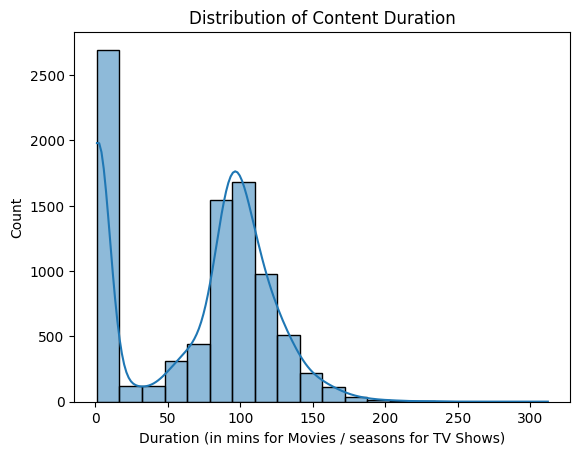

In [122]:
# distribution of content duration (in mins or seasons)
sns.histplot(df['duration_int'], bins=20, kde=True)
plt.title('Distribution of Content Duration')
plt.xlabel('Duration (in mins for Movies / seasons for TV Shows)')
plt.ylabel('Count')
plt.show()


- There are two main peaks:
  - One near 0–10, which is likely for TV Shows with 1 or 2 seasons
  - Another around 90–100, which is common for Movies of about 1.5 hours
- Most of the content is either short or medium in length
- Very few content pieces are extra long — like movies longer than 2 hours or shows with many seasons
- Overall, Netflix mostly offers shorter content, which works well for quick watching and mobile users


### 🔹 Univariate Plot 2: Number of Cast Members

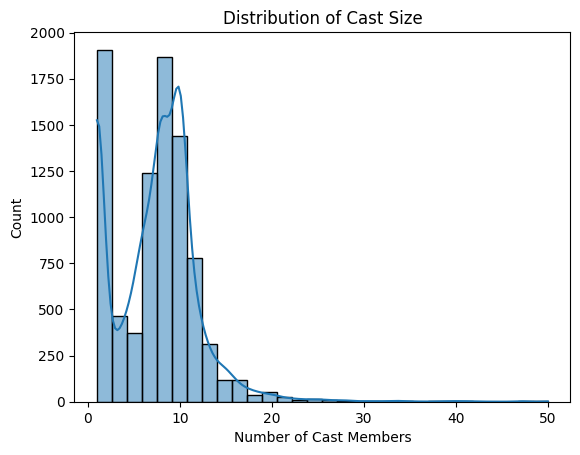

In [123]:
# distribution of number of cast members per title
sns.histplot(df['num_cast'], bins=30, kde=True)
plt.title('Distribution of Cast Size')
plt.xlabel('Number of Cast Members')
plt.ylabel('Count')
plt.show()



- Most content on Netflix has between **2 to 10 cast members**
- There's a small peak at **1**, possibly for solo performances or content with just one lead
- Very few content pieces have a cast size above **20**, indicating that large ensemble casts are rare
- The overall trend shows that Netflix content usually involves small to medium-sized casts


### 🔹 Univariate Plot 3: Content Added Over the Years

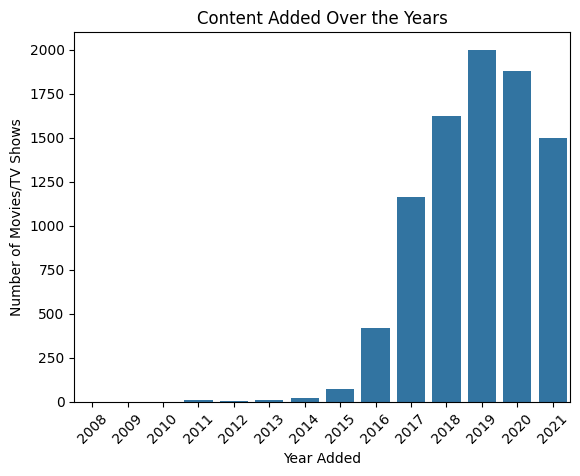

In [124]:
# how much content was added each year
sns.countplot(x='year_added', data=df, order=sorted(df['year_added'].dropna().unique()))
plt.title('Content Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Movies/TV Shows')
plt.xticks(rotation=45)
plt.show()

#### Observation

- Netflix's content growth accelerated sharply after **2015**
- The highest number of additions happened in **2019**, followed closely by 2020 and 2018
- Very little content was added before 2014, which shows that Netflix’s real expansion started in the last 7–8 years
- The slight dip in 2021 may be due to content saturation, strategic rebalancing, or slower additions after years of rapid growth



### 🔹 Univariate Plot 4: Most Common Genres on Netflix

In [125]:
# top genres after exploding the genre list
top_genres = df['genre_list'].explode().value_counts().head(10)

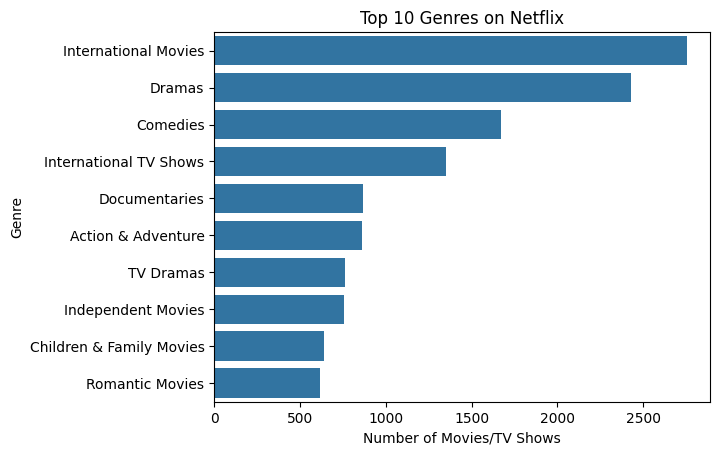

In [126]:
# barplot of top genres
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Movies/TV Shows')
plt.ylabel('Genre')
plt.show()



- **International Movies** and **Dramas** are the most common genres on Netflix
- Genres like **Comedy** and **International TV Shows** are also quite popular
- Other genres like **Documentaries**, **Action & Adventure**, and **Romantic Movies** appear less but are still significant
- Overall, the platform seems to focus on storytelling-heavy and globally relatable content


### 🔹 Univariate Plot 5: Audience Category Distribution (Rating Category)

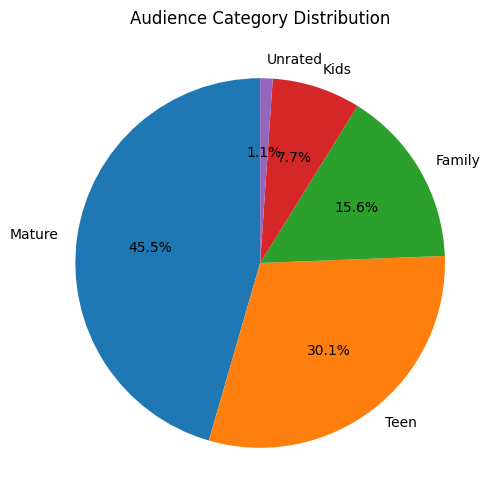

In [127]:
# pie chart of rating categories
df['rating_category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6))
plt.title('Audience Category Distribution')
plt.ylabel('')  # optional: remove y-label
plt.show()



- Almost **half of Netflix content** is targeted at **Mature audiences**
- About **30%** is for **Teens**, which is also a big segment
- Only **15%** falls under **Family viewing**, and just **7%** is made for **Kids**
- Very few shows are **Unrated**
- Overall, Netflix clearly focuses more on adult and teenage viewers compared to family or children


### 🔹 Univariate Plot 6: Content Contribution by Country

In [128]:
# explode country_list and get value counts
country_counts = df['country_list'].explode().value_counts()

In [129]:
# group top 5 + others
top_5 = country_counts[:5]
others = country_counts[5:].sum()

In [130]:
# combine into a new Series
country_grouped = pd.concat([top_5, pd.Series({'Others': others})])

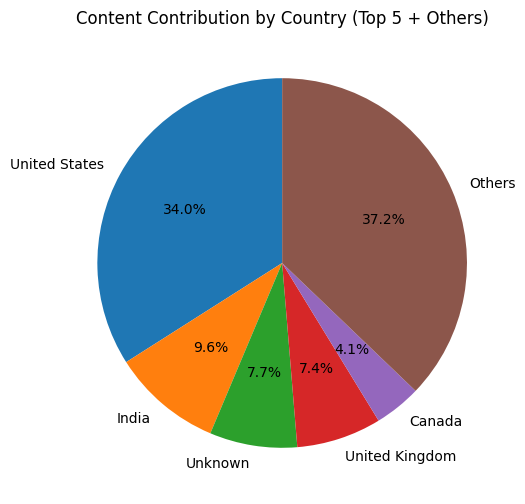

In [131]:
# pie chart
country_grouped.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6))
plt.title('Content Contribution by Country (Top 5 + Others)')
plt.ylabel('')
plt.show()

#### Observation

- Around **34%** of the content on Netflix comes from the **United States**
- **India** contributes about **10%**, while **Canada** and the **UK** are lower but still visible
- A noticeable **7.7%** is tagged as **Unknown**, likely due to missing data
- More than **one-third** of the content comes from all other countries combined



*⚠️Note: To understand whether global representation is increasing over time, we’ll explore country-wise trends across years in the bivariate analysis section.*


### 🔹 Univariate Plot 7: Content Added by Month

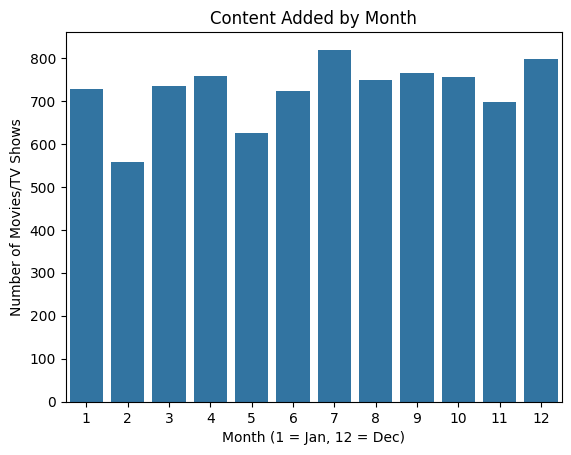

In [132]:
# countplot for content added per month
sns.countplot(x='month_added', data=df, order=sorted(df['month_added'].dropna().unique()))
plt.title('Content Added by Month')
plt.xlabel('Month (1 = Jan, 12 = Dec)')
plt.ylabel('Number of Movies/TV Shows')
plt.show()



- Content is added throughout the year, with no extreme highs or lows
- Slightly more content seems to be added in **July** and **December**
- The dip in **February** could be due to fewer days in the month
- Overall, Netflix does not rely on a fixed release season — content is added fairly evenly across months


### 🔹 Univariate Plot 8: Duration of Movies

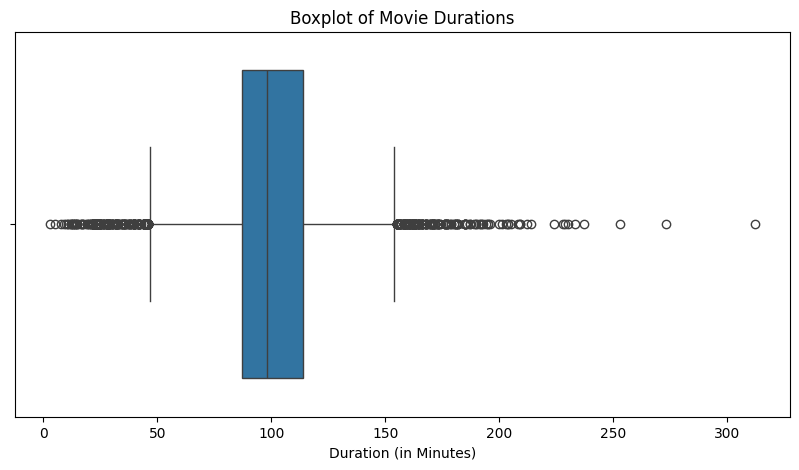

In [147]:
# boxplot of movie durations
plt.figure(figsize=(10, 5))  # width=10, height=5
sns.boxplot(x=df[df['type'] == 'Movie']['duration_int'])
plt.title('Boxplot of Movie Durations')
plt.xlabel('Duration (in Minutes)')
plt.show()



- Most Movies on Netflix fall between **90 to 120 minutes**
- A few titles go beyond **150 minutes**, including some outliers even above 250 minutes
- The distribution is fairly tight, showing Netflix prefers standard-length movies
- Outliers represent long-format specials or extended editions, but are rare


### 🔹Univariate Plot 9: Number of Seasons in TV Shows

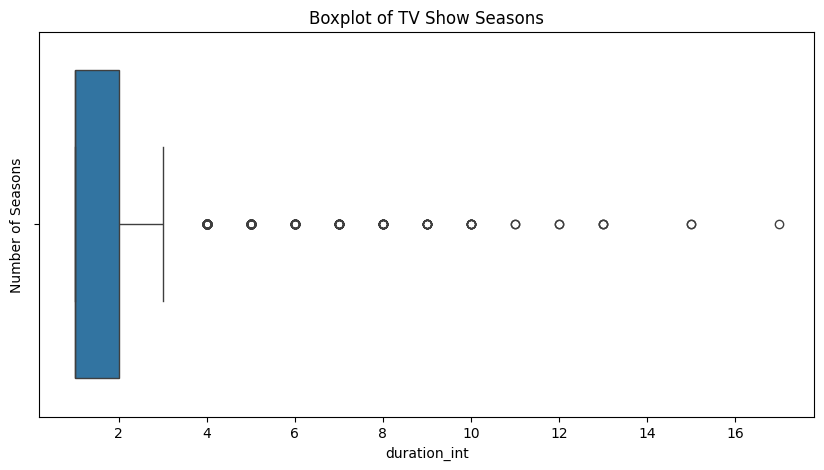

In [148]:
# number of seasons for tv shows
plt.figure(figsize=(10, 5))
sns.boxplot(x=df[df['type'] == 'TV Show']['duration_int'])
plt.title('Boxplot of TV Show Seasons')
plt.ylabel('Number of Seasons')
plt.show()


- Most TV Shows on Netflix have **1 to 2 seasons**, with 1 season being the most common
- A few shows go beyond **3 or 4 seasons**, and some long-runners reach **10+ seasons** as outliers
- The overall spread is tight, suggesting Netflix prefers short-format or limited-series shows
- Long-running shows exist but are relatively rare


## 🔷 Summary of Univariate Visual Insights

The univariate analysis helped understand key content characteristics and volume patterns across Netflix’s catalogue:

- **Content Duration**  
  Most Movies on Netflix are between **90–120 minutes**, while TV Shows typically have **1–2 seasons**, with only a few long-running exceptions. This highlights a clear preference for compact, binge-friendly formats.

- **Cast Size**  
  Cast sizes are generally small, with most content featuring **under 10 actors**. Larger ensembles are less common and may be tied to specific genres or production types.

- **Genre Preferences**  
  The most common genres include **International Movies**, **Dramas**, and **Comedies**, reflecting Netflix’s focus on **globally relatable** and **emotionally engaging** storytelling.

- **Audience Segments**  
  Nearly **half the content is targeted at Mature audiences**, while **Kids and Family** categories form a smaller share. This tilt in content strategy is later examined in rating trends.

- **Content Volume Growth**  
  Content addition surged after **2015**, reaching a peak around **2019**, before slightly tapering off. This aligns with Netflix’s international expansion and original production boom.

- **Geographic Origin**  
  The majority of content still originates from the **United States**, followed by **India** and other major global regions — laying the groundwork for deeper country-wise insights.

- **Seasonal Patterns**  
  Content is added fairly consistently throughout the year, with **slight peaks in July and December**, possibly tied to strategic release cycles or global holidays.




###🔹 Bivariate Plot 1A: Content Addition Trend — Top 5 Countries

In [133]:
# explode and group by year and country
country_year = df.explode('country_list').groupby(['year_added', 'country_list']).size().unstack(fill_value=0)

In [134]:
# optional: get top countries only to simplify plot
top_countries = country_year.sum().sort_values(ascending=False).head(5).index
filtered = country_year[top_countries]

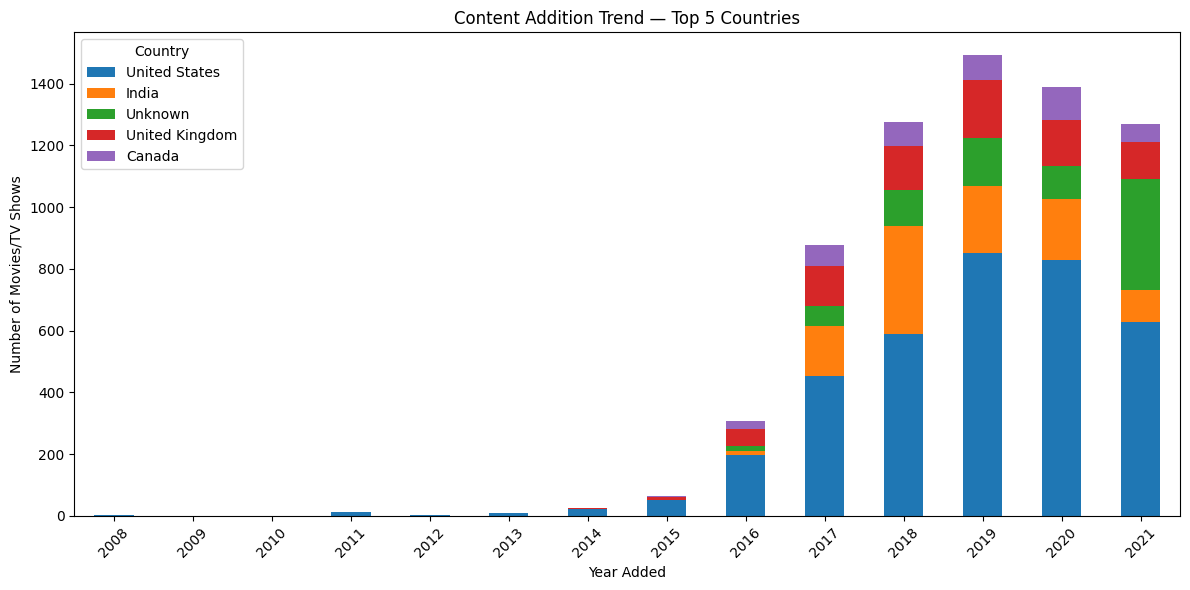

In [135]:
# stacked bar chart for top 5 countries
filtered.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Content Addition Trend — Top 5 Countries')
plt.xlabel('Year Added')
plt.ylabel('Number of Movies/TV Shows')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



- The **United States** has contributed the highest number of titles consistently every year
- Starting from **2017**, other countries like **India**, **UK**, and **Canada** began adding more content — but still far behind the US
- The rise of **‘Unknown’** after 2019 may be due to missing or inconsistent metadata
- While there is some growth in international content, the catalog is still heavily US-dominated
- We'll now compare the top 5 group with all other countries to see if overall global representation has actually improved


### 🔹 Bivariate Plot 1B: Content Addition Trend — Top 5 vs Other Countries


In [136]:
# explode country and group by year
country_year = df.explode('country_list').groupby(['year_added', 'country_list']).size().unstack(fill_value=0)


In [137]:
# identify top 5 countries
top_5_countries = country_year.sum().sort_values(ascending=False).head(5).index

In [138]:
# create 'Top 5' and 'Others' group
country_year['Top 5'] = country_year[top_5_countries].sum(axis=1)
country_year['Others'] = country_year.drop(columns=top_5_countries).sum(axis=1)

In [139]:
# keep only Top 5 and Others
country_grouped = country_year[['Top 5', 'Others']]

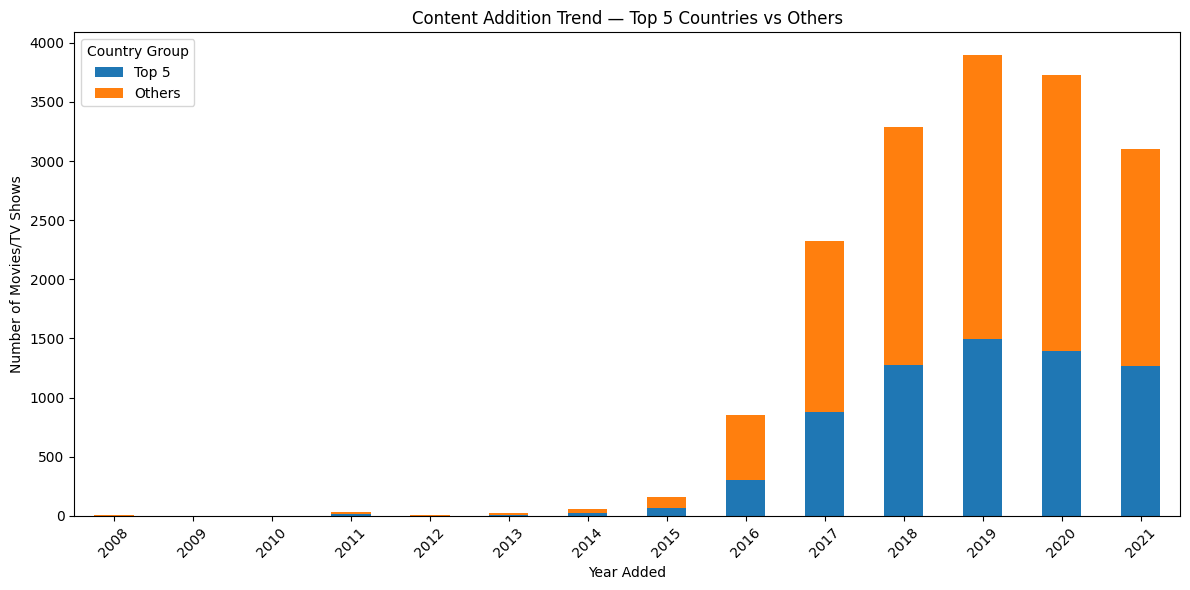

In [140]:
# plot stacked bar
country_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Content Addition Trend — Top 5 Countries vs Others')
plt.xlabel('Year Added')
plt.ylabel('Number of Movies/TV Shows')
plt.legend(title='Country Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Until 2017, most of Netflix’s content was coming from the top 5 countries
- From 2018 onward, content from **other countries** started increasing significantly
- In 2019 and 2020, **other countries actually contributed more than the top 5** — a big shift
- This confirms that Netflix is clearly expanding its content base globally

### 🔹 Bivariate Plot 2: Cast Size by Rating Category





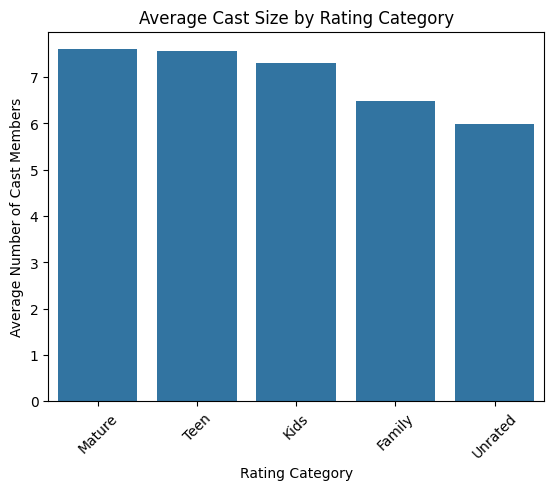

In [141]:
# average cast size per rating category
cast_means = df.groupby('rating_category')['num_cast'].mean().sort_values(ascending=False)

sns.barplot(x=cast_means.index, y=cast_means.values)
plt.title('Average Cast Size by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Average Number of Cast Members')
plt.xticks(rotation=45)
plt.show()





- **Mature** and **Teen** content has the highest average cast size — above 7 actors per title
- **Kids** content also has relatively high cast count, possibly due to animated or ensemble shows
- **Family** and **Unrated** content have smaller average casts
- Overall, content made for older audiences tends to involve more characters or broader storytelling


### 🔹 Bivariate Plot 3: Number of Genres by Rating Category

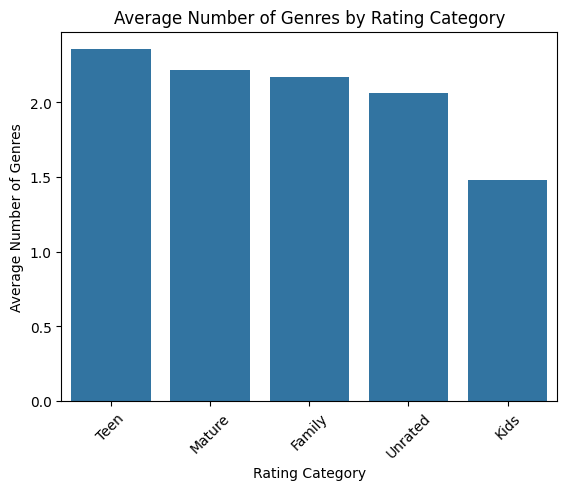

In [142]:
# average number of genres per rating category
genre_means = df.groupby('rating_category')['num_genres'].mean().sort_values(ascending=False)

sns.barplot(x=genre_means.index, y=genre_means.values)
plt.title('Average Number of Genres by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Average Number of Genres')
plt.xticks(rotation=45)
plt.show()



- **Teen** and **Mature** content are usually tagged with the most genres — often crossing 2 genres per title
- **Family** content also shows good genre variety
- **Kids** content is tagged with the fewest genres on average, indicating it’s usually more focused and niche
- This pattern suggests that content for older viewers tends to mix genres more — possibly to attract a wider audience


###🔹 Bivariate Plot 4: Rating Category Trend Over the Years

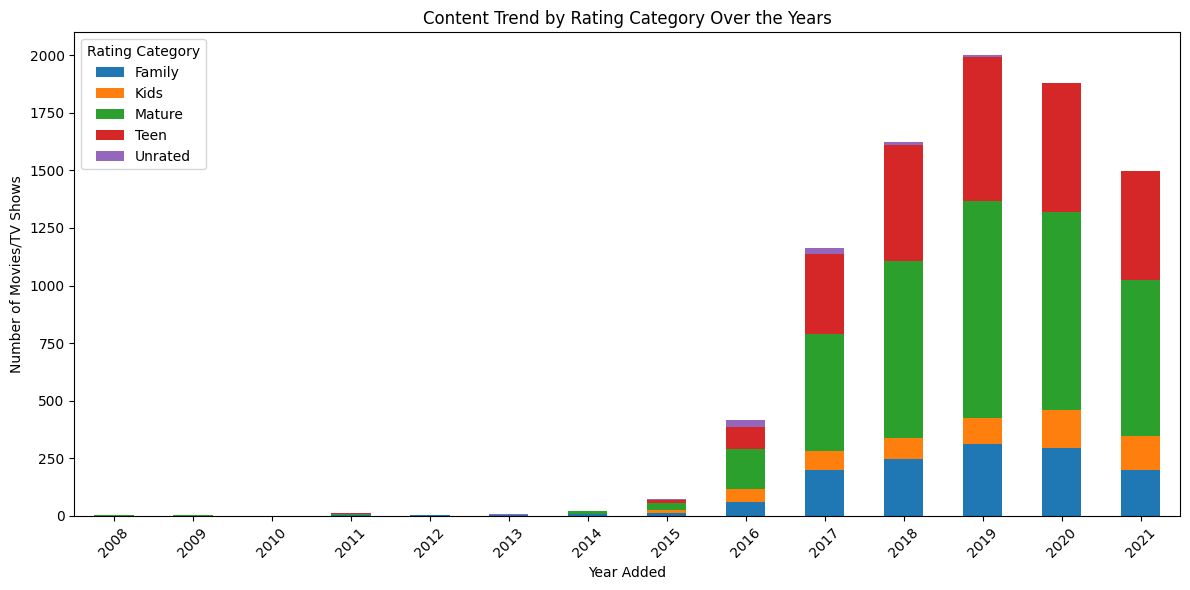

In [143]:
# group by year and rating category
rating_trend = df.groupby(['year_added', 'rating_category']).size().unstack(fill_value=0)

# plot stacked bar chart
rating_trend.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Content Trend by Rating Category Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Movies/TV Shows')
plt.legend(title='Rating Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




- Starting from 2016, Netflix began adding significantly more content across all rating categories
- **Mature** and **Teen** content grew the fastest, especially between 2017 and 2020
- **Family** content also increased but stayed below Mature and Teen
- **Kids** content grew slowly and has remained the smallest category overall
- The trend shows that Netflix has leaned more towards content for older audiences while offering limited growth in child-focused content


### 🔹 Bivariate Plot 5: Genre Richness by Content Type

<ipython-input-149-3029386c17de>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_by_type = df.groupby('type')['num_genres'].mean().sort_values(ascending=False)


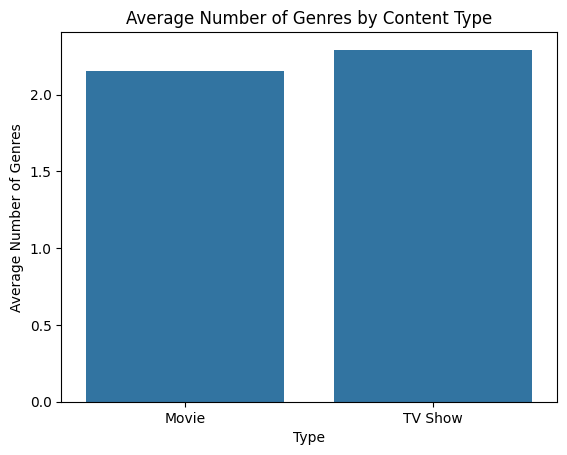

In [149]:
# average number of genres per type
genre_by_type = df.groupby('type')['num_genres'].mean().sort_values(ascending=False)

sns.barplot(x=genre_by_type.index, y=genre_by_type.values)
plt.title('Average Number of Genres by Content Type')
plt.xlabel('Type')
plt.ylabel('Average Number of Genres')
plt.show()



- On average, **TV Shows** are tagged with slightly more genres than Movies
- This suggests that shows may be promoted across multiple themes to appeal to a wider audience


### 🔹 Bivariate Plot 6: Top Genres in Movies vs TV Shows

In [150]:
# explode genre
exploded = df.explode('genre_list')

In [151]:
# filter separately
movie_genres = exploded[exploded['type'] == 'Movie']['genre_list'].value_counts().head(10)
tv_genres = exploded[exploded['type'] == 'TV Show']['genre_list'].value_counts().head(10)


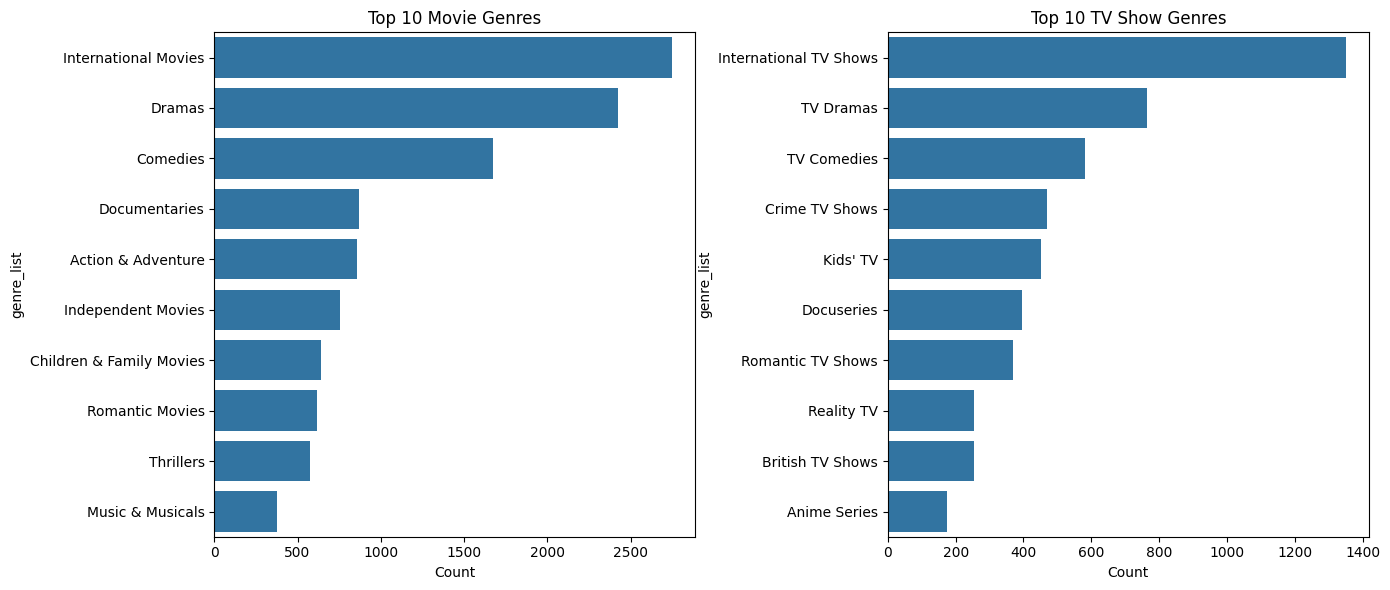

In [155]:
# plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=movie_genres.values, y=movie_genres.index, ax=axes[0])
axes[0].set_title('Top 10 Movie Genres')
axes[0].set_xlabel('Count')

sns.barplot(x=tv_genres.values, y=tv_genres.index, ax=axes[1])
axes[1].set_title('Top 10 TV Show Genres')
axes[1].set_xlabel('Count')

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.show()


- **International content** leads in both categories — showing Netflix’s global-first content strategy
- **Dramas and Comedies** dominate in both Movies and TV Shows, but in shows, they appear as **TV Dramas/TV Comedies**
- **Documentaries** are more common in Movies, while **Docuseries** appear in shows — reflecting the episodic format
- TV Shows feature more niche categories like **Crime**, **Reality TV**, and **Anime**, which are absent from top Movie genres
- This highlights how Netflix uses shows to experiment with genre diversity while keeping Movies closer to conventional formats


###🔹 Bivariate Plot 7: Correlation Heatmap

In [159]:
# converting to int
df['is_multi_country_flag'] = df['is_multi_country'].astype(int)

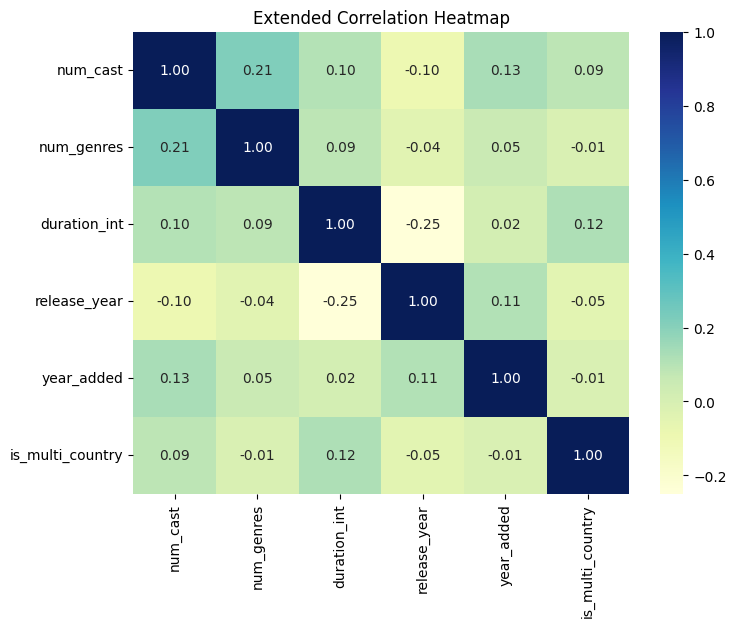

In [160]:
corr_cols = ['num_cast', 'num_genres', 'duration_int', 'release_year', 'year_added', 'is_multi_country']
corr_matrix = df[corr_cols].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Extended Correlation Heatmap')
plt.show()



- Content with more cast members tends to be tagged with more genres, though the relationship is quite weak
- Longer-duration content is slightly more common among older releases — possibly due to older storytelling formats
- Content available in multiple countries tends to be longer, but the correlation is not very strong
- There’s minimal correlation between when content was released and when it was added to Netflix — both old and new content is added regularly
- Overall, the features are mostly independent, which is helpful as each one brings a unique aspect to the analysis


### 🔹 Pairplot of Numeric Features

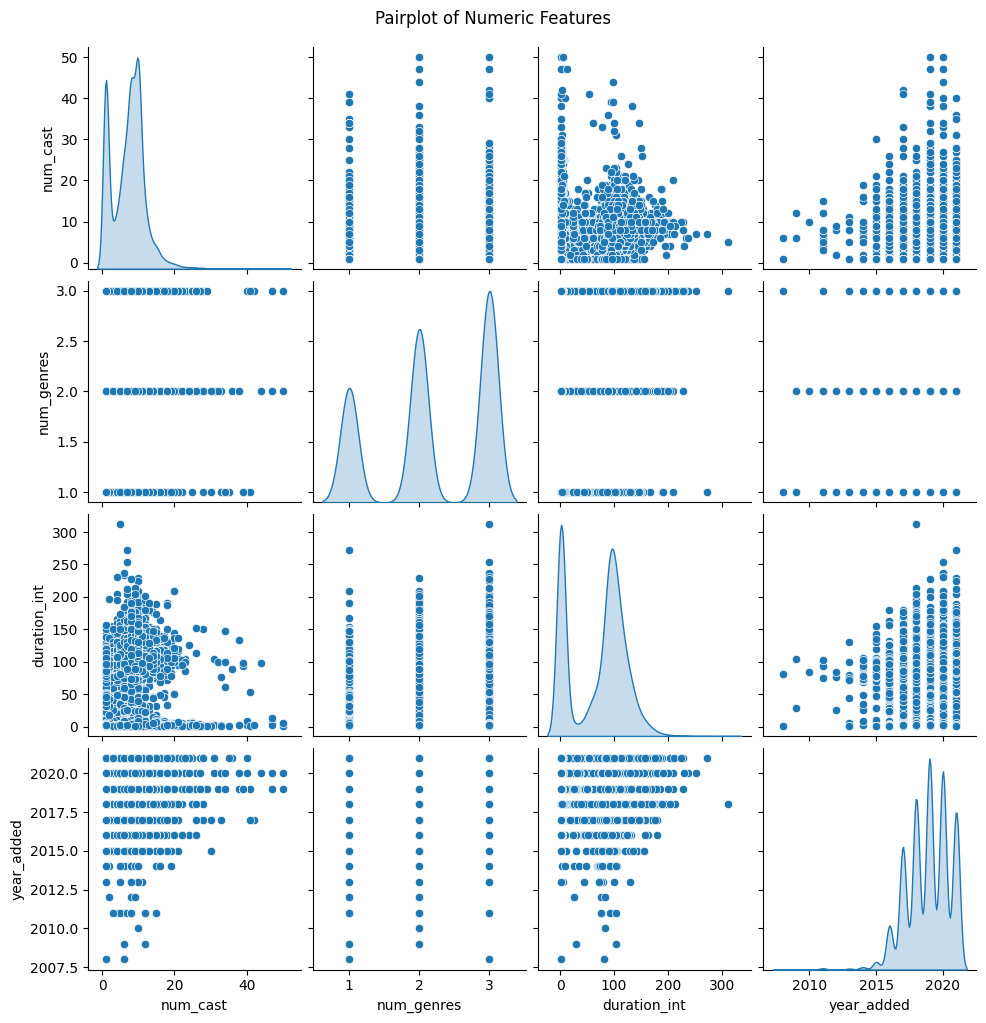

In [161]:
# Select relevant numeric columns
num_df = df[['num_cast', 'num_genres', 'duration_int', 'year_added']]

# Create pairplot
sns.pairplot(num_df, diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()


- Most content has a small cast (under 15) and is tagged with 1–3 genres
- There’s a weak positive spread between cast size and duration — visible but not strong
- `year_added` shows a clear concentration after 2015 — confirming Netflix’s rapid expansion
- The distributions match what we observed in boxplots and histograms earlier
- No major linear patterns observed, which aligns with the heatmap — features remain fairly independent


## 🔷 Summary of Bivariate Visual Insights

The bivariate visual analysis helped uncover meaningful patterns between content attributes and business-relevant dimensions:

- **Country Trends**  
  The United States dominates overall content production, but content from other countries (especially India and global regions) has increased notably in recent years. A comparison between Top 5 vs Others confirmed Netflix’s expanding global focus.

- **Audience Targeting**  
  Rating trends show a heavy focus on Mature and Teen content over time, with Kids and Family-friendly categories receiving less attention. This skew could impact Netflix’s reach across diverse age groups.

- **Cast Size and Genre Diversity**  
  Content tagged for mature and teen audiences tends to have slightly larger casts. Similarly, TV Shows show a marginally higher genre count than Movies, hinting at more cross-genre storytelling in episodic content.

- **Genre Preferences by Type**  
  Top genres differ by format: Movies lean toward International, Drama, and Romance genres, while TV Shows emphasize Crime, Reality, and Anime. This shows Netflix tailors genre strategies based on content type.

- **Content Duration & Structure**  
  Boxplots showed that most Movies are ~90–120 minutes long, while TV Shows generally have 1–2 seasons. These trends reflect Netflix’s preference for shorter formats across both categories.

- **Correlation & Feature Independence**  
  Correlation analysis showed weak or no strong linear relationships between features like duration, genres, and cast size — confirming each feature adds unique value. Pairplots supported this and helped visualize these relationships in more detail.

These visual insights form the analytical foundation for business-oriented recommendations in the next section.


## 🔵 Business Insights

###🔹 Insight 1: Audience Focus
- **Data Shows:** Most Netflix content is rated for Mature and Teen viewers, making up close to 80% of the platform’s total catalog.

- **Business Insight**:  Netflix is doing well by targeting this dominant viewer group, but there’s clear room to bring in more content for Family and Kids. This could help expand its presence among household users and shared accounts. We’ll explore how seasonality can support this next.

### 🔹 Insight 2: Seasonality Patterns
- **Data Shows:** Content is released throughout the year, but there’s a slight spike during July and December.
- **Business Insight:** These months could be ideal for pushing new content that appeals to families, students, and casual viewers. Netflix can experiment with seasonal drops during holidays or school breaks to capture under-used audience segments and increase platform stickiness.

###🔹 Insight 3: Global Expansion
- **Data Shows:** Content from the United States still dominates, but countries like India, UK, and Canada have shown consistent additions in recent years. A comparison of Top 5 vs Others shows that the share of content from other countries has grown steadily since 2018.
- **Business Insight:** While Netflix’s content base is still US-heavy, the growing presence of other countries signals a shift. Netflix can double down on regional production and co-productions, especially in countries that are contributing more year by year. This also helps with language diversity and local storytelling.

### 🔹 Insight 4: Genre Strategy
- **Data Shows:** Dramas, Comedies, and International Movies are the most frequent genres across both Movies and TV Shows. TV Shows also include niche genres like Crime, Anime, and Reality TV, while Movies stay more conventional.
- **Business Insight:** Netflix is already strong in globally appealing genres like Drama and Comedy, but can consider boosting genre diversity within Movies. There's also potential to push niche genres in untapped regions, especially through TV format where viewers are more open to variety.

### 🔹Genre Trends Over Time (Top 5 Genres)

In [162]:
# Explode genre and group by year
genre_trend = df.explode('genre_list').groupby(['year_added', 'genre_list']).size().unstack(fill_value=0)

In [165]:
# Filter for Movies and get top 5 genres
movie_genres = exploded[exploded['type'] == 'Movie']
top_movie_genres = movie_genres['genre_list'].value_counts().head(5).index
movie_trend = movie_genres[movie_genres['genre_list'].isin(top_movie_genres)]
movie_plot = movie_trend.groupby(['year_added', 'genre_list']).size().unstack(fill_value=0)

In [166]:
# Filter for TV Shows and get top 5 genres
tv_genres = exploded[exploded['type'] == 'TV Show']
top_tv_genres = tv_genres['genre_list'].value_counts().head(5).index
tv_trend = tv_genres[tv_genres['genre_list'].isin(top_tv_genres)]
tv_plot = tv_trend.groupby(['year_added', 'genre_list']).size().unstack(fill_value=0)

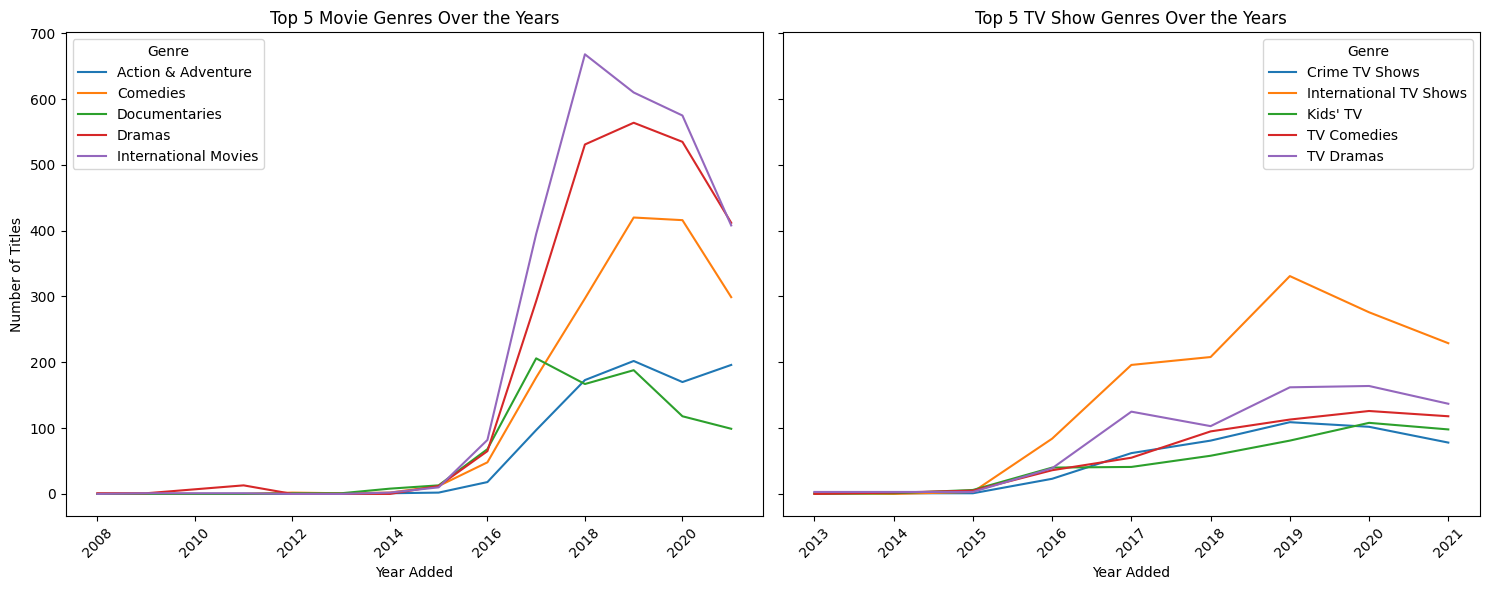

In [167]:
#plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

movie_plot.plot(ax=axes[0])
axes[0].set_title('Top 5 Movie Genres Over the Years')
axes[0].set_xlabel('Year Added')
axes[0].set_ylabel('Number of Titles')
axes[0].legend(title='Genre')
axes[0].tick_params(axis='x', rotation=45)

tv_plot.plot(ax=axes[1])
axes[1].set_title('Top 5 TV Show Genres Over the Years')
axes[1].set_xlabel('Year Added')
axes[1].legend(title='Genre')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

###🔹 Insight 5: Genre Growth Over Time
- **Data Shows:**In Movies, genres like International Movies, Dramas, and Comedies have grown rapidly, especially after 2016. For TV Shows, International TV Shows, TV Dramas, and Kids’ TV have shown consistent growth with visible peaks around 2019.
- **Business Insight:** Netflix is clearly investing in genres that connect globally and emotionally. These trends can be taken forward by exploring other potential genre areas that haven’t peaked yet. This could include region-specific stories, experimental formats, or untapped audience preferences that vary across countries.

###🔹 Insight 6: Content Format Preferences
- **Data Shows:** Most Movies are between 90 to 120 minutes, and most TV Shows have only 1 or 2 seasons. Very few content pieces extend beyond that, even in high-performing genres.

- **Business Insight:** This compact format works well for binge-worthy viewing, but Netflix can experiment with a few longer-format shows, especially in genres where users tend to stay longer (like crime, thriller, or docudramas). This can improve engagement time and retention.

###🔹 Insight 7: Cast Size vs Rating

- **Data Shows:**  
Content rated for Mature and Teen audiences tends to have slightly larger cast sizes on average. Kids content usually features smaller casts, while Family content stays somewhere in between.

- **Business Insight:**  
This indicates that Netflix invests more heavily in production scale for its adult and young adult segments. If the goal is to expand Kids and Family viewership, experimenting with more engaging ensemble formats or richer character diversity in those segments could help boost interest and variety.

### 🔹 Insight 8: Feature Independence

- **Data Shows:**  
There is no strong correlation between cast size, duration, or genre count. These features behave independently across content.

- **Business Insight:**  
This gives Netflix the flexibility to try different combinations — like short content with big casts, or single-genre stories with longer runtimes. It also means creative or regional teams can experiment with each element without needing to adjust everything else.



## 🔷 Final Recommendations

1. **Increase content for Kids and Family segments**, especially to balance the current focus on Mature and Teen content.

2. **Time new Kids/Family releases around school holidays and festive seasons** like July and December to maximize reach and engagement.

3. **Continue expanding global content**, especially from high-growth regions like India and the UK. Also, explore untapped countries to diversify the catalog.

4. **Identify under-utilized genres** and push them in formats where Netflix already sees strong traction, like experimental or regional TV shows.

5. **Use genre trends by format to guide future investments** — focus on growing TV formats in niche genres, and widen movie variety beyond Drama and Comedy.

6. **Explore longer-format content** in high-engagement genres like thrillers or docuseries to drive binge sessions and session duration.

7. **Experiment with ensemble casts or richer storytelling in Kids and Family content** to attract broader household viewership.

8. **Give creative teams flexibility** to mix and match features like duration, cast size, and genre without worrying about standard formulas — most content features are not tightly linked.


In [170]:
print("Created with ❤️ By - Hardik Dhamija")

Created with ❤️ By - Hardik Dhamija
